<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: Generate Descriptive Statistics and Visualizations

### 1. Boxplot for "Median Value of Owner-Occupied Homes" (MEDV)

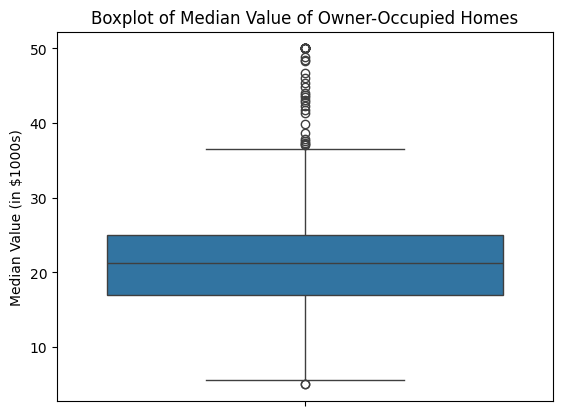

In [6]:
sns .boxplot (y= 'MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes') 
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show()

### 2. Bar Plot for the Charles River Variable (CHAS)

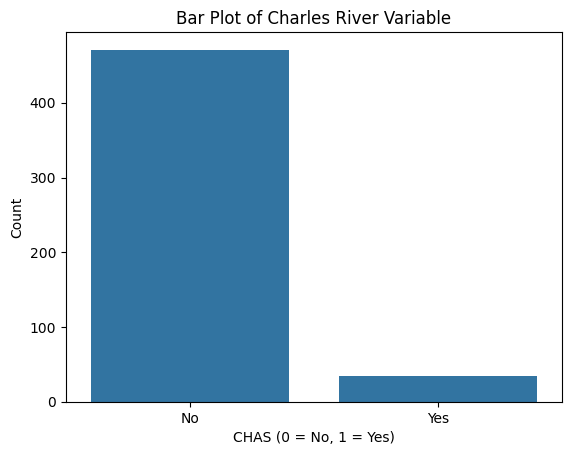

In [7]:
chas_counts = boston_df['CHAS'].value_counts()
sns.barplot(x=chas_counts.index, y=chas_counts.values)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('CHAS (0 = No, 1 = Yes)')
pyplot.ylabel('Count')
pyplot.xticks([0, 1], ['No', 'Yes'])
pyplot. show()

### 3. Boxplot for MEDV vs. Discretized AGE

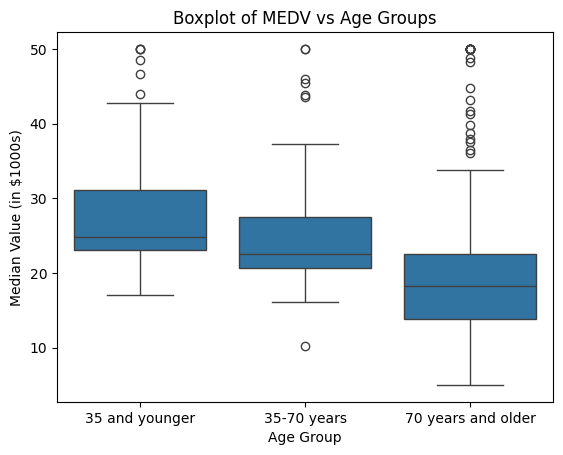

In [8]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70 years',
'70 years and older'])
# Boxplot for MEDV vs AGE_GROUP
sns.boxplot(x= 'AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs Age Groups') 
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show()

### 4. Scatter Plot for NOX vs. INDUS

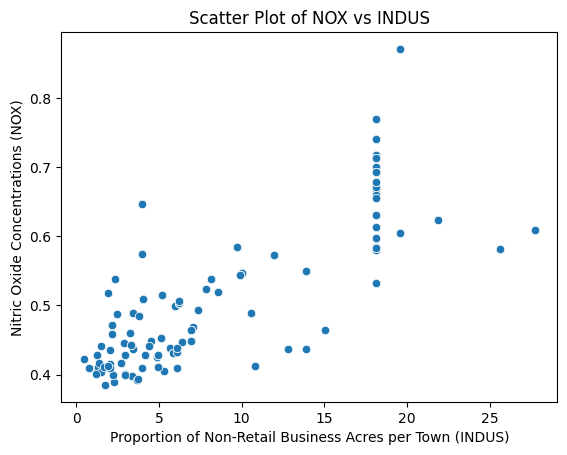

In [9]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)') 
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

### 5. Histogram for the Pupil-to-Teacher Ratio (PTRATIO)

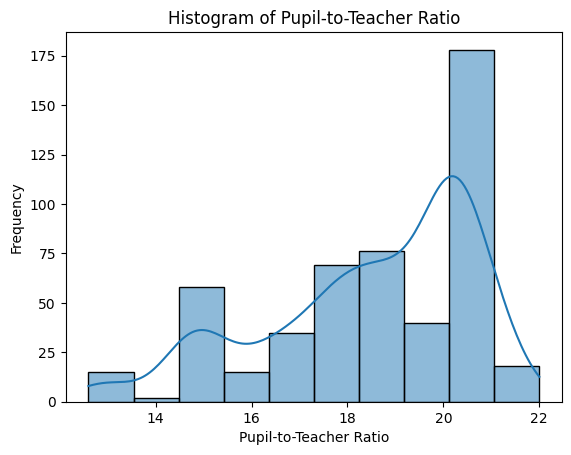

In [10]:
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title('Histogram of Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel ('Frequency')
pyplot.show()

## Task 3: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in the median value of houses bounded by the Charles River? (T-test for independent samples)
 - Null Hypothesis (Ho): There is no significant difference in the median value of houses bounded by the Charles River (CHAS = 1) and those that are not (CHAS = 0).
  - Alternative Hypothesis (H,): There is a significant difference in the median value of houses bounded by the Charles River and those that are not.

In [19]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV' ]

t_stat, p_value = stats.ttest_ind(chas_0, chas_1)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print ("Conclusion: Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.


### 2. Is there a difference in median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)
- Null Hypothesis (Ho): There is no significant difference in the median values of houses across different age groups.
- Alternative Hypothesis (Hi): There is a significant difference in the median values of houses across different age groups.

In [21]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70 years', '70 years and older'])
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35-70 years']['MEDV'],
    boston_df [boston_df ['AGE_GROUP'] == '70 years and older']['MEDV']
)

print (f"ANOVA F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print ("Conclusion: Reject the null hypothesis. There is a significant difference in the median values of houses across age groups.")
else:
    print ("Conclusion: Fail to reject the null hypothesis. There is no significant difference in the median values of houses across age groups.")

ANOVA F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a significant difference in the median values of houses across age groups.


### 3. Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)? (Pearson Correlation)
- Null Hypothesis (Ho): There is no relationship between NOX and INDUS.
- Alternative Hypothesis (Hi): There is a relationship between NOX and INDUS.

In [24]:
correlation, P_value = stats.pearsonr(boston_df["NOX"], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value}")
if P_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209192, P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


### 4. What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV)? (Regression Analysis)
- Null Hypothesis (Ho): The weighted distance to employment centers (DIS) has no impact on the median value of owner-occupied homes (MEDV).
- Alternative Hypothesis (H1): The weighted distance to employment centers (DIS) has an impact on the median value of owner-occupied homes (MEDV).


In [26]:
# Add a constant to the independent variable (DIS) for the regression model
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

# Fit regression model
model = sm.OLS(y, X).fit()
print(model.summary())

slope = model_params['DIS']

intercept = model_params['const']

print(f"Regression Coefficient (Slope): {slope}")
print(f"Intercept: {intercept}")

if slope != 0:
    print("Conclusion: Reject the null hypothesis. The weighted distance to employment centers has an impact on the median value of owner-occupied homes.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The weighted distance to employment centers has no impact on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        11:05:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<class 'NameError'>: name 'model_params' is not defined